# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import warnings
warnings.filterwarnings("ignore")

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# Select three indices of your choice you wish to sample from the dataset
indices = [3,100, 350]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265,1196,4221,6404,507,1788
1,11594,7779,12144,3252,8035,3029
2,3521,1099,1997,1796,173,995


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

considering the data of the three sample customer, the following observation can be made:

* *The First Sample Customer*: this customer had the highest purchase amount of fresh, milk and frozen products. It could be a a restaurant who provide catering service.

* *The Second Sample Customer*: this customer had the highest purchase amount of grocery, detergent & paper and delicatessen product. Additionally its fresh and milk product purchase wasn't far lower than that of the first customer. it could be a mid-size retail store who sells a wide range of product to the general public.

* *The Third Sample Customer*: This customer had the by far lowest purchase amount on each product. Among its purchase, it purchased mostly on fresh, grocery and frozen product. It could be small cafe or retail shop who cater for the need of a local neighbourhood 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
label_name='Milk'
new_data = data.drop([label_name], axis=1)
milk=data[label_name]

rnd=0
X_train, X_test, y_train, y_test = train_test_split(new_data, milk, test_size=0.25, random_state=rnd)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=rnd)
regressor.fit(X_train,y_train)
predict=regressor.predict(X_test)

# Report the score of the prediction using the testing set
score = r2_score(y_test,predict)
print("r2_score is: {:.6f}".format(score))


r2_score is: 0.365725


**Additional Analysis** 

The following code attemp to perform a more systematic analysis on feature relevancy by performing the above analysis 20 time for each feature, and calculate number of time the regressor converge, the average convergence score, and the number of time the regressor fails to converge 

In [5]:
from IPython.display import display

# a list to keep number of positive score (i.e. amount of convergence time) of the model for each feature
positive_counts=[]

# a list to keep the mean positive R2 score for each feature   
mean_positive_scores=[]

# perform the analysis for each features of the data
for label_name in data.keys():
    
    # drop the feature from the data, and use it as label 
    new_data = data.drop([label_name], axis=1)
    label=data[label_name]
    positive_scores=[]
    for i in xrange(0,100):
        # Split the data into training and testing sets using the given feature as the target
        X_train, X_test, y_train, y_test = train_test_split(new_data, label, test_size=0.25, random_state=i)
        # Create a decision tree regressor and fit it to the training set
        regressor = DecisionTreeRegressor(random_state=0)
        regressor.fit(X_train,y_train)
        predict=regressor.predict(X_test)
        # Report the score of the prediction using the testing set
        score = r2_score(y_test,predict)
        if score>0:
            positive_scores.append(score)
    positive_scores=np.array(positive_scores)
    positive_counts.append((positive_scores>0).sum())
    if len(positive_scores)>0:
        mean_positive_scores.append(positive_scores.mean())
    else:
        mean_positive_scores.append(np.nan)

        
feature_relevancy_df=pd.DataFrame(index=data.keys())
feature_relevancy_df['Average R2 scores']=mean_positive_scores
feature_relevancy_df['Number of positive R2 scores']=positive_counts
display(feature_relevancy_df)

print('the correlation between Grocery and Detergents_Paper is {:.4f}'.format(data.Grocery.corr(data.Detergents_Paper)))
print('the correlation between Grocery and Milk is {:.4f}'.format(data.Grocery.corr(data.Milk)))


,Average R2 scores,Number of positive R2 scores
Fresh,0.057398,3
Milk,0.299537,86
Grocery,0.667112,100
Frozen,0.093876,8
Detergents_Paper,0.694777,100
Delicatessen,0.183500,18


the correlation between Grocery and Detergents_Paper is 0.9246
the correlation between Grocery and Milk is 0.7283


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

In the initial analysis, the feature 'Milk' was used as the label for the prediction. The prediction score for this particular run was 0.365725. This is not a strong R^2 score, additionally, changing the random split would cause the model fails to converge at some value - although most random state values did converge.  The conclusion was that this feature 'Milk' was mildly correlated to customers' spending habit. 


Additional analysis was then performed to more systematically analyse the features. For each feature, 100 random train/test split was performed based on different random state. the results can be seen in the above table. 
As shown in this table, the features 'Grocery' and 'Detergents_Paper' quite strongly correlate to other features.

Furthermore, the correlation between Grocery and Detergents_Paper are shown to be 0.92, meaning that customer who bought Grocery were very likely to buy Detergents_Paper. To a less extent, with a correlation of 0.728, customers who bought Grocery were also likely to buy Milk. 

In conclusion, based on this analysis, the features that are strongly relevant to customer spending habits are Grocery, Detergents_Paper and Milk. While the other three features Fresh, Frozen and Delicatessen are less relevant by comparison. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

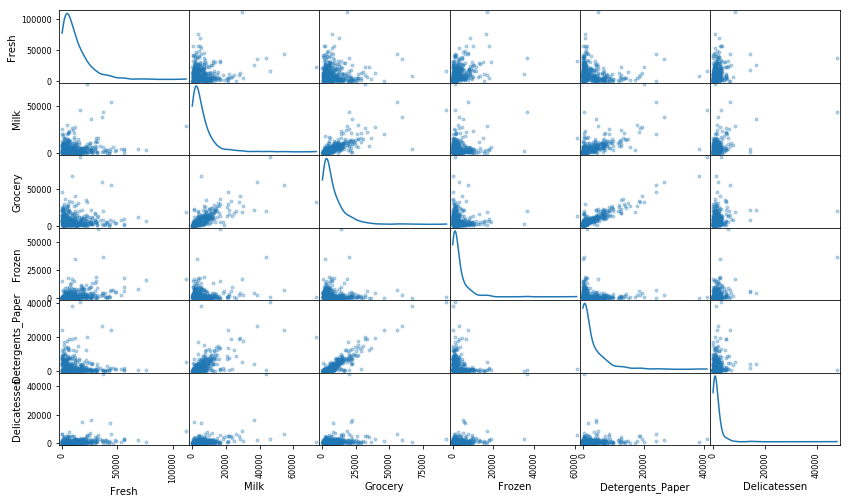

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

**Pair-wise correlation between features**

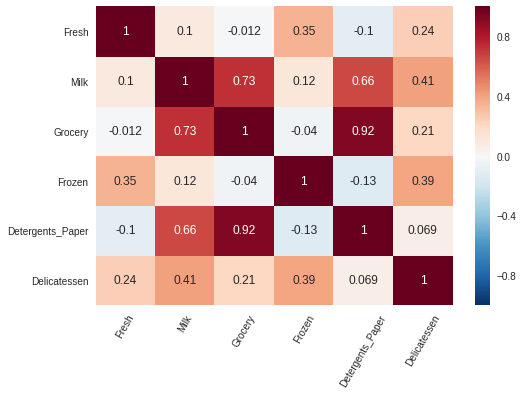

In [32]:
# Additional analysis to display the pair-wise correlation of features with a heatmaps - suggestion from reviewer 
import seaborn as sns
sns.heatmap(data.corr(), annot=True);

plt.xticks(rotation=60)
plt.show()

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Observing from this scatter matrix and the heatmap, one can confirm the strong correlation of 0.92 between the Grocery and the Detergents_Paper features, in that the dots tend to concentrate on the diagonal axis. Additionally, as shown in the above headmap, strong correlation beyond 0.5 can also be identified between Milk and Grocery, and between Milk and Detergents_Paper

This confirms the finding on the additional analysis performed above in the answer for Questions 2, that the three features Milk, Grocery and Detegents_Papers are particular relevenat to customers' spending habits. 

For each of these features, the data appear to be concentrate on the lower section of the possible value range, indicating that for each feature there is outlier value in the higher part of the value range. One can also observe that the spread of the value of different features was different. For instance, the spread of the majority value points on the Fresh feature is wider than that of Frozen and Delicatessen.  



## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

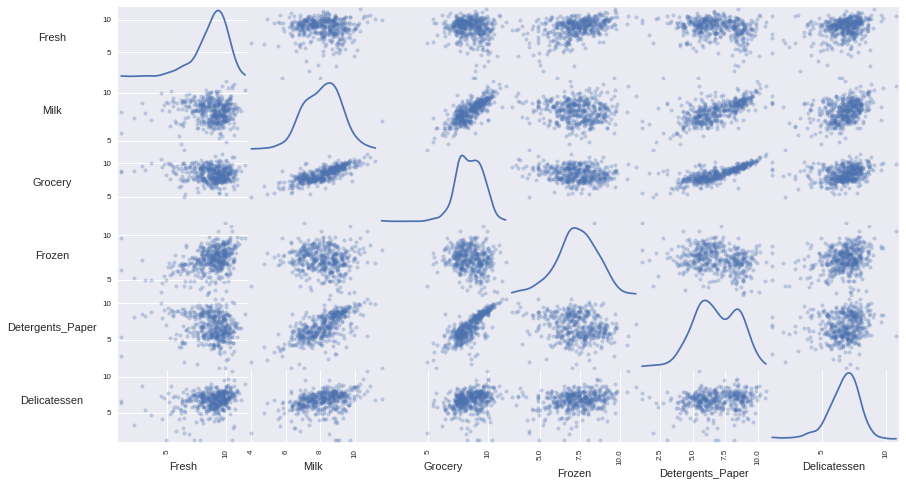

In [8]:
# Scale the data using the natural logarithm
log_data=np.log(data)

# Scale the sample data using the natural logarithm
log_samples=np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
axs=pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# rotate the y axis label to display the label properly 
n=len(log_data.columns)
for x in range(n):
    for y in range(n):
        ax=axs[x,y]
        # set the rotation angle
        ax.yaxis.label.set_rotation(0)
        # make sure there is enough space between the labels and the plot 
        ax.yaxis.labelpad=50



### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
1,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
2,8.166500,7.002156,7.599401,7.493317,5.153292,6.902743


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
# This routine is rewritten to provide a function that can calculate the outlier value for both original data value
# and data value after log transform

def outlier_identification(data, log_transform=True):
    data_outlier=pd.DataFrame(data=np.zeros(data.shape), columns=log_data.keys()).astype(np.int8)
    data_values=data.copy(deep=True)
    if log_transform: data_values=np.log(data)
    
    # For each feature find the data points with extreme high or low values
    for feature in data.keys():

        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(data_values[feature], 25)

        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(data_values[feature], 75)

        # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = 1.5*(Q3-Q1)

        # identify outlier index for a given feature
        feature_outlier_index=data[~((data_values[feature] >= Q1 - step) & (data_values[feature] <= Q3 + step))].index

        # change the value from zero to 1 for the corresponding cell in the dataframe to indicate outlier status
        data_outlier.loc[feature_outlier_index, feature]=1

    data_outlier['outlier_feature_count']=data_outlier.sum(axis=1)
    
    return data_outlier



For the outlier identification exercise, I decided to perform outlier detection for both the log-transformed data and the original data values. 

The reason being that it is apparent that in each case the nature of identified outliers are differents. It is therefore interesting to compare this difference and consider this within the underlying business context.

The following code provide the analysis output for outlier detection with log-transformed data

**outlier identification with log transformed data** 

In [11]:
# perform outlier identification with log transform 
data_outlier=outlier_identification(data, log_transform=True)

print("outlier identification with log transform")
print("------------------------------------------------")
# identify how many data points are identified with one outlier features 
print("{: d} data points are identified to have  at least 1 outlier features".format(len(data[data_outlier.outlier_feature_count>=1])))

# identify how many data points are identified with two outlier features 
print("{: d} data points are identified to have  at least 2 outlier features".format(len(data[data_outlier.outlier_feature_count>=2])))

# identify how many data points are identified with three outlier features 
print("{: d} data points are identified to have at least 3 outlier features".format(len(data[data_outlier.outlier_feature_count>=3])))


print("\n"*2)

print("display outlier identification matrix with at least 2 outlier features")
print("------------------------------------------------")
display(data_outlier[data_outlier.outlier_feature_count>=2])

print("\n"*2)
print("display original data corresponding with identification matrix for outlier with at least 2 outlier features")
print("------------------------------------------------")
display(data[data_outlier.outlier_feature_count>=2])

print("\n"*2)
print("display log transformed data corresponding with identification matrix for outlier with at least 2 outlier features")
print("------------------------------------------------")
display(log_data[data_outlier.outlier_feature_count>=2])


outliner identification with log transform
------------------------------------------------
 42 data points are identified to have  at least 1 outliner features
 5 data points are identified to have  at least 2 outliner features
 1 data points are identified to have at least 3 outliner features



display outliner identification matrix with at least 2 outliner features
------------------------------------------------


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,outliner_feature_count
65,1,0,0,1,0,0,2
66,1,0,0,0,0,1,2
75,0,0,1,0,1,0,2
128,1,0,0,0,0,1,2
154,0,1,1,0,0,1,3





display original data corresponding with identification matrix for outliner with at least 2 outliner features
------------------------------------------------


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
75,20398,1137,3,4407,3,975
128,140,8847,3823,142,1062,3
154,622,55,137,75,7,8





display log transformed data corresponding with identification matrix for outliner with at least 2 outliner features
------------------------------------------------


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


It can be observed that when using log-transformed data for outlier detection, most of the outliers that are identified are those **lower** than lower bound outlier log-transformed threshold of *Q1-Step* 



**outlier identification with original data** 
The following code present the analysis output for outlier detection with the original data. 

In [12]:
# perform outlier identification without log transform 
data_outlier=outlier_identification(data, log_transform=False)

print("outlier identification without log transform")
print("------------------------------------------------")
# identify how many data points are identified with one outlier features 
print("{: d} data points are identified to have at least 1 outlier features".format(len(data[data_outlier.outlier_feature_count>=1])))

# identify how many data points are identified with two outlier features 
print("{: d} data points are identified to have at least 2 outlier features".format(len(data[data_outlier.outlier_feature_count>=2])))

# identify how many data points are identified with three outlier features 
print("{: d} data points are identified to have at least 3 outlier features".format(len(data[data_outlier.outlier_feature_count>=3])))

# identify how many data points are identified with four outlier features 
print("{: d} data points are identified to have at least 4 outlier features".format(len(data[data_outlier.outlier_feature_count>=4])))

# identify how many data points are identified with five outlier features 
print("{: d} data points are identified to have at least 5 outlier features".format(len(data[data_outlier.outlier_feature_count>=5])))

# identify how many data points are identified with six outlier features 
print("{: d} data points are identified to have 6 outlier features".format(len(data[data_outlier.outlier_feature_count==6])))

print("\n"*2)


print("display outlier identification matrix with at least 4 outlier features")
print("------------------------------------------------")
display(data_outlier[data_outlier.outlier_feature_count>=4])

print("\n"*2)
print("display original data corresponding with identification matrix for outlier with at least 4 outlier features")
print("------------------------------------------------")
display(data[data_outlier.outlier_feature_count>=4])

print("\n"*2)
print("display log transformed data corresponding with identification matrix for outlier with at least 4 outlier features")
print("------------------------------------------------")
display(log_data[data_outlier.outlier_feature_count>=4])


outliner identification without log transform
------------------------------------------------
 108 data points are identified to have at least 1 outliner features
 41 data points are identified to have at least 2 outliner features
 17 data points are identified to have at least 3 outliner features
 4 data points are identified to have at least 4 outliner features
 1 data points are identified to have at least 5 outliner features
 1 data points are identified to have 6 outliner features



display outliner identification matrix with at least 4 outliner features
------------------------------------------------


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,outliner_feature_count
47,1,1,1,1,1,1,6
92,0,1,1,0,1,1,4
181,1,1,0,1,0,1,4
251,0,1,1,0,1,1,4





display original data corresponding with identification matrix for outliner with at least 4 outliner features
------------------------------------------------


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
47,44466,54259,55571,7782,24171,6465
92,9198,27472,32034,3232,18906,5130
181,112151,29627,18148,16745,4948,8550
251,6134,23133,33586,6746,18594,5121





display log transformed data corresponding with identification matrix for outliner with at least 4 outliner features
------------------------------------------------


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
47,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
92,9.126741,10.220923,10.374553,8.080856,9.847235,8.542861
181,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
251,8.721602,10.049015,10.421865,8.816705,9.830594,8.541105


It can be observed that when using original data values for outlier detection, far more outliers can be detected. Additionally, most of the outliers that are identified are those **higher** than higher bound outlier original value threshold of *Q3+Step* 



### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

As described in the above code and analysis, outlier detection exercise are performed in both scenarios of 1) with log-transform data, and 2) with original data.

The observation is that with log-transformed data, a smaller amount of outliers are detected, and most of them were those lower than the lower bound outlier threshold (*Q1-Step*).

With original data, the outlier detected using original value are mostly those with value higher than the higher bound outlier threshold (*Q3+Step*)

Moreover, a larger amount of outliers are detected with the original values: 108 data points were identified to have at one outlier features, while only 42 data points were identified when log transformed is applied. 41 data points were identified to have at two outlier features, while only 5 data points were identified when log transformed is applied.

In the business context of this data set, it was decided that the outlier detection with log-transformed data is more relevant. This is considering the fact that the data was taken from customer record from wholesale market, where it is possible that some of the customers were large size retails stores that make far more purchased than the average customer. 

In the other hand, outlier that is detected with log-transformed data indicates customers with very small amount of purchase. In this case, it could be individuals who were making personal purchase under company ID. This type of outlier is therefore more conflicting with the business purpose of performing customer segmentation for this particular dataset. 

Still, it is quite possible that specific customer have a particular low level of interest in one or two types of product, and it is also possible that due to seasonality they chose to not to purchase such product while investing more on other product types. For instance, the customer with index 65 made a very small amount of purchase on Fresh and Frozen, but its purchase of Grocery and Detergents_Paper were typical of an enterprise amount. 

By observing the outliers detected with log-transform, I decided only one of this data point shall be removed. This is that of customer index 154, who made very small level of purchase on 3 types of product (Milk, Grocery, and Delicatessen), and also only purchased small amount of other 3 types.

So finally the following code removed this customer with index 154 from the dataset. 

In [13]:
outliers=[154]
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
good_data.shape

(439, 6)

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

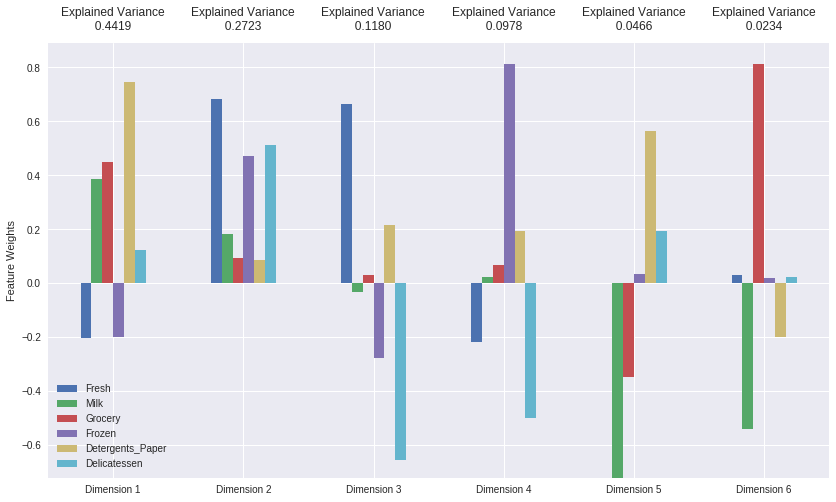

In [14]:
from sklearn.decomposition import PCA

# explicitly name the principal components (PCs) in to two list
PCs=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6'] # list of all PCs


# Apply PCA by fitting the good data with the same number of dimensions as features
pca=PCA()

# perform fit_transform so that we can also have the transformed featured in the form of a dataframe 
pca_good_data=pd.DataFrame(pca.fit_transform(good_data), columns=PCs)

# Transform the sample log-data using the PCA fit above
pca_samples=pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [15]:
# Additional analysis to see the correlation between original features and the principal components

good_data_withPCs=pd.concat([good_data, pca_good_data], axis=1)
features_PC_correlation=good_data_withPCs.corr().filter(PCs).drop(PCs)

display(features_PC_correlation)

,PC1,PC2,PC3,PC4,PC5,PC6
Fresh,-0.304280,0.792324,0.506621,-0.151240,0.000320,0.009902
Milk,0.785729,0.289863,-0.037424,0.019230,-0.480865,-0.256142
Grocery,0.887688,0.144322,0.030507,0.061115,-0.223930,0.369283
Frozen,-0.344498,0.628622,-0.247266,0.651637,0.018446,0.006615
Detergents_Paper,0.949523,0.084835,0.141703,0.114980,0.233179,-0.059466
Delicatessen,0.203032,0.679313,-0.572194,-0.398311,0.105733,0.008695


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first and second principal components explain %71.4 of the variance in the data. The first four principal components explain 93% of the variance in the data. 

In order to better interpret the first four dimension, in additional to the visualisation (referred as *PCA visualisation*), a correlation matrix were calculated providing pair-wise correlation between the six features and the each of the first four principal components (referred as *PCA & features correlation matrix*). 

In this discussion, the observation is focused on features that are assigned significant features weight (with magnitude bigger than 0.3 in *PCA visualisation*) and had a significant correlation with the principal component(with magnitude bigger than 0.5 in *PCA & features correlation matrix*).  The interpretation of the first four principal components in term of customer spending is provided in the following:

* **First Principal Component (PC1)**: We can observe from the PCA visualisation that most weighted components are that of Milk, Grocery, and Detegents_Paper. Each of these three features has a strong correlation with PC1 that is higher than 0.75. In particular, the correlation between Detegents_Paper and PC1 is almost at 0.95. This indicates that this component can be seen as a measure to how much detergent & paper a customer would buy.  Moreover, a significant percentage (44.2%) of the variance in the data can be explained by this one component. It points to a significant underlying pattern which, as shown by the strong correlations between Milk, Grocery, Detergents_Paper and  PC1, customers often purchase the three corresponding products together.  Just from the features that are strongly correlated with PC1, customers who are retail establishment offering daily household products are likely to present high value for this principal component. 

* **Second Principal Component (PC2)**: PC2 is the only principal component that only contains positive feature weight and has a positive correlation with each feature. This points to an underlying pattern in the data in which customers' purchase of all six products vary in the same direction albeit with different magnitude, and in particular, the amount of purchase of Fresh, Frozen and Delicatessen are correlated with each other in this pattern. Fresh, Frozen and Delicatessen are food related products. Therefore customers who present high value in this principal component are likely to be establishments who offer catering service. 

* **Third Principal Component (PC3)**: As shown in the PCA visualisation, PC3 points to a customer spending pattern in which the increase in the purchase of certain products correlate with a decrease in others. In particular, the increase of purchase of Fresh products in this pattern comes with a decrease for Delicatessen of equal magnitude. Customers who present high value in this principal component might be those who offer locally sourced product to their customer and place more focus on the freshness of the item they offer.  

* **Fourth Principal Component (PC4)**: PC4 points to a customer spending pattern that is strongly influenced by the purchase of Frozen product. The Frozen feature is assigned a weight of close to 0.8 and shows a significant correlation of 0.65 with PC4,   It can be observed that the feature Delicatessen also is also assigned a significant feature weight, however its correlation magnitude with PC4 is not as high.  Therefore, customers who present high value for this principal component are likely to be establishments that had a strong preference for frozen products such as  butcher shops 


In addition to the above discussion, it can be observed from the *PCA & feature correlation matrix* that, in general, the correlations between features and principal components decrease as the order of the principal component increases. Despite the fact that strong feature weights are still assigned to feature on a high order, there is no pair of principal component and feature display correlation beyond 0.5 beyond PC4. This serves as a justification for the choice of focusing the analysis on the first four principal components. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [16]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.2209,1.3733,-0.5280,0.4726,0.6767,0.6650
1,2.2551,1.9035,-0.2151,0.3226,0.5865,-0.0564
2,-1.9297,-0.6074,-0.9178,-0.2328,0.2381,0.2466


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [17]:
# Apply PCA by fitting the good data with only two dimensions
pca=PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data=pca.transform(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples=pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [18]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.2209,1.3733
1,2.2551,1.9035
2,-1.9297,-0.6074


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

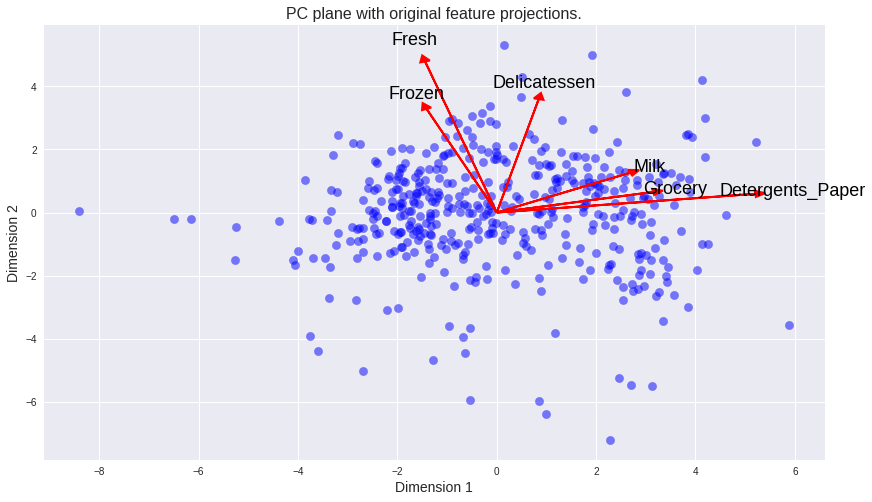

In [19]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

** Answer: **

From the biplot, the feature 'Detergents_Paper', 'Milk' and 'Grocery' are most strongly correlated with the first component. For the second component, the most correlated features are 'Fresh', 'Frozen' and 'Delicatessen'. These observations are consistent with the pca_result plot. 

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

The advantage of using K-Means clustering and Gaussian Mixture Model algorithm are listed below:

* **Advantage of K-Means:** [1][1]
    * *Simplicity*: Simple, easy to implement
    * *Interpretability*: Easy to interpret the clustering results
    * *Speed*: fast and efficient in terms of computational cost, typically **O(K\*n\*d)** 
    * *Robustness*: Practically work well even when some of the following assumptions are broken 1) cluster size is imbalanced, 2) features are not independent of each other, 3) clusters have different density 


* **Advantage of Gaussian Mixture Model:** [2][2]
    * *Speed*: it is the fastest algorithm for learning mixture models
    * *Agnostic*: As this algorithm maximises only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structure that might or might not apply
 

Given the observation on the wholesale customer data so far, I will use the k-mean algorithms for its interpretability, also for its robustness especially we have observed that some of the features are highly correlated with each other. 

 
[1]:https://www.quora.com/What-are-the-advantages-of-K-Means-clustering
[2]:http://scikit-learn.org/stable/modules/mixture.html

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [20]:
# Implementation of K-Mean clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# create function to perforrm K-Means clustering over the dataset, to be reused in future steps 
def kmean_cluster(k, data, sample_data):
    # initiate K-Means instance
    clusterer=KMeans(n_clusters=k, random_state=0, n_jobs=-1)
    
    # predict the cluster for each data point
    kmean_preds=clusterer.fit_predict(data)
    
    # find the cluster centers 
    centers=clusterer.cluster_centers_

    # predict the cluster for each sampled data point 
    sample_preds=clusterer.predict(sample_data)
    
    # calculate the mean sihouette coefficient for the number of clusters chosen 
    score=silhouette_score(data, kmean_preds)
    
    return kmean_preds, centers, sample_preds, score




In [21]:
# iterate over several K value to observe the sihouette score

for k in range(2,8):
    kmean_preds, centers, sample_preds, score = kmean_cluster(k, reduced_data, pca_samples)
    print("K-Mean score for {: d} clusters is {:.6f}, predicted cluster for sampled data is {}".format(k, score, sample_preds))

    

K-Mean score for  2 clusters is 0.422445, predicted cluster for sampled data is [0 1 0]
K-Mean score for  3 clusters is 0.397526, predicted cluster for sampled data is [1 0 1]
K-Mean score for  4 clusters is 0.330023, predicted cluster for sampled data is [3 1 0]
K-Mean score for  5 clusters is 0.349716, predicted cluster for sampled data is [0 1 3]
K-Mean score for  6 clusters is 0.354040, predicted cluster for sampled data is [1 0 5]
K-Mean score for  7 clusters is 0.362624, predicted cluster for sampled data is [1 0 1]


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

As shown in the above implementation, k values from 2 to 7 were tried in the implementation. The value is shown in the following table:


| K Values | Silhouette Score |
| :-------:| :---------------:|
| 2        | 0.422445         |
| 3        | 0.397526         |
| 4        | 0.330023         |
| 5        | 0.349716         |
| 6        | 0.354040         |
| 7        | 0.362624         |


As shown in the above table, the best silhouette score is obtained when the number of clusters is set to 2. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [22]:
# Improved version of cluster_results function of the visualisation script
# This displays the sample index when the marker of sample are displayed
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def cluster_results2(reduced_data, preds, centers, pca_samples):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''

    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    for row in pd.DataFrame(pca_samples).iterrows():
        idx=row[0]
        i=row[1][0]
        c=row[1][1]
        ax.scatter(x = i, y = c, \
               s = 200, linewidth = 1, color = 'white', edgecolors='black', marker = 's');
        ax.scatter(x = i, y = c, marker='$%d$'%(idx), alpha = 1, s=100, color='black');


    # Set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");

display clustering visualisation for 3 clusters
------------------------------------------------


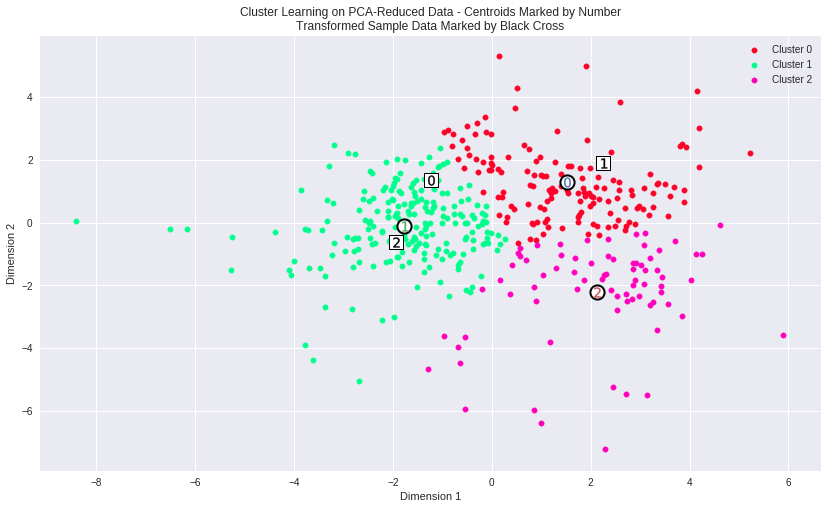

In [23]:
# Display the results of the clustering  for K=3 from implementation
kmean_preds, centers, sample_preds, score = kmean_cluster(3, reduced_data, pca_samples)
print("display clustering visualisation for 3 clusters")
print("------------------------------------------------")
cluster_results2(reduced_data, kmean_preds, centers, pca_samples)

display clustering visualisation for 4 clusters
------------------------------------------------


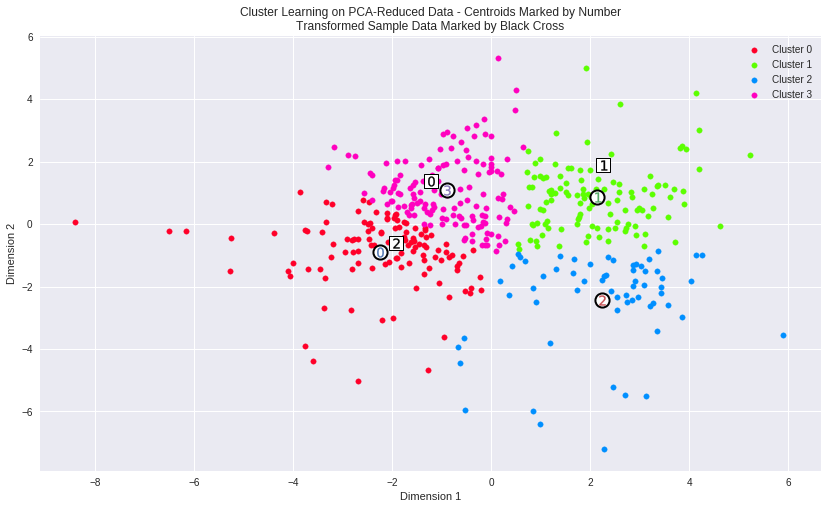

In [24]:
# Display the results of the clustering  for K=4 from implementation
kmean_preds, centers, sample_preds, score = kmean_cluster(4, reduced_data, pca_samples)
print("display clustering visualisation for 4 clusters")
print("------------------------------------------------")
cluster_results2(reduced_data, kmean_preds, centers, pca_samples)

display clustering visualisation for 2 clusters
------------------------------------------------


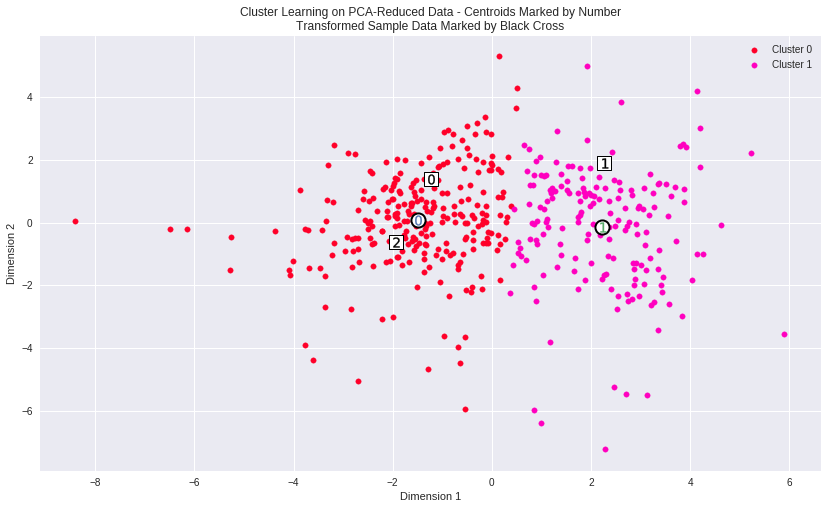

In [25]:
# Finally Display the results of the clustering  for K=2 from implementation
kmean_preds, centers, sample_preds, score = kmean_cluster(2, reduced_data, pca_samples)
print("display clustering visualisation for 2 clusters")
print("------------------------------------------------")
cluster_results2(reduced_data, kmean_preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [26]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9047.0,1943.0,2400.0,2113.0,296.0,695.0
Segment 1,3575.0,7761.0,12516.0,892.0,4610.0,964.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

When the data is clustered into two clusters and then projected to 2D space with the first two principal components dimensions, it can be observed from the visualisation that the data points are divided by the line Dimension 1 = 0. Dimension 1 corresponds to the first principal component of the PCA analysis, which indicate an underlying spending pattern which correlates with the amount spent on Milk, Grocery and Detergents & Paper.

Based on this segmentation, the establishments that are represented by each segment can be considered as the following:

* *Segment 0*: This could represent establishments that are in the non-retailing business, for instance, restaurants or cafes of various sizes who purchase less day-to-day household goods, but prefer food related items like Fresh and Frozen products

* *Segment 1*: This segment are likely to represent establishments that are mid to large size retails stores who sell products for day-to-day household needs, and depends on the local context may also offer food-related products, such as a mid-size supermarket.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [27]:
# Display the sample data
display(samples)

# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265,1196,4221,6404,507,1788
1,11594,7779,12144,3252,8035,3029
2,3521,1099,1997,1796,173,995


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

As discussed in the answer to question 8, when showing the data with the reduced principal component dimensions, the segments are mainly created alongside the line dimension 1=0. This indicates that the segmentation is largely corresponding to the amount of spending on milk, grocery and detergents_paper. 

For *sample point 0*, its spending on milk, grocery and detergents_paper were not significantly high. For this reason, it is best represented by *segment 0*, this is consistent with the clustering prediction. 

For *sample point 1*, it's spending on milk, grocery and detegents_paper were by far the highest among the sample points, it's spending on the other three categories of products were also quite high. For this reason, it is best represented by *segment 1*, this is consistent with the clustering prediction.  This can be observed in the clustering visualisation with the first two principal components - it is located to the upper direction of the centre of cluster 1. 

For *sample point 2*, its spending amount is the lowest among the sample in each product categories. For this reason, it is best represented by *segment 0*, this is consistent with the clustering prediction. This can be observed in the clustering visualisation with the first two principal components - it is located to the lower left direction of the centre of cluster 0



## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
The change in the delivery service is most likely to effect different customers differently - considering the different underlying spending trend identified so far.  However, the same segment of customer might exhibit a similar reaction to the same change in the delivery service. 

Base on this assumption, the wholesale distributor can perform A/B tests on samples from different segments of customers and then measure the reason from these sampled customers from different segments.  This measurement can be obtained by measuring the purchase amount from the wholesale distributor's sales channel (i.e. purchasing website).  The A/B test can be performed in a way that, for half of the samples of the same customer segments, apply the current delivery schedule (5 days a week), while for the other half  apply the proposed delivery schedule (3 days a week)

When studying the results from the A/B test for a given customer segment, the wholesale distributor can measure if sales figure has increased from the half of the sample that receives the 3 days a week delivery schedule. If the improvement is positive and considered to be significant, then the new delivery schedule can be rolled out to this particular customer segment. 


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The wholesale distributor can use supervised learning to perform classification for the new customers, in the following steps:

1. Use the existing data as train data, use the *customer segment* feature as the label, and use the sales data for the six categories of products as features. 
2. Use a classification algorithm just as logistic regression to construct a classification model. While constructing classification model, K-fold cross-validation and gridsearch method can be applied to identified an optimised model with parameters giving optimum cross validation result.
3. Use the data for the ten new customers as test data. Use the anticipated annual spending for each of the product category as features for prediction. The prediction for each customer is therefore the predicted customer segment for the corresponding customer. 

The wholesale distributor can then apply the appropriate delivery service according to the predicted customer segment for each of the new customer. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

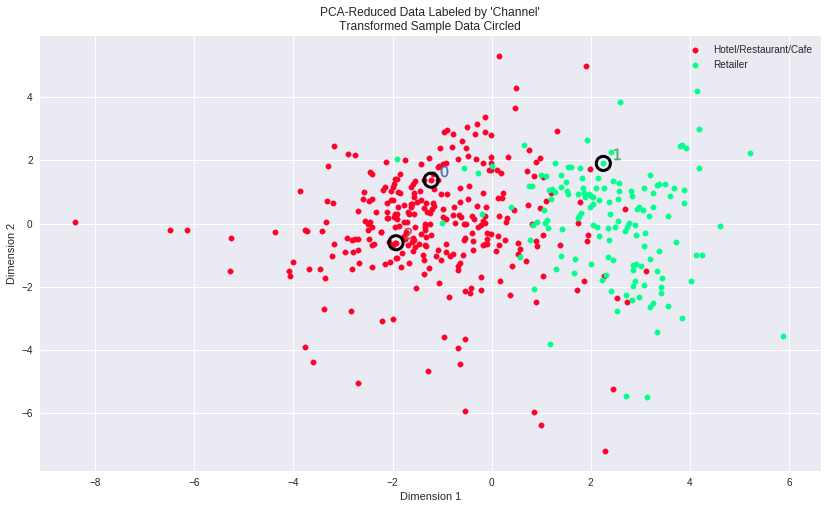

In [28]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

display clustering visualisation for 4 clusters, in which cluster 0 is a pure Hotel/Restaurant/Cafe cluster
------------------------------------------------


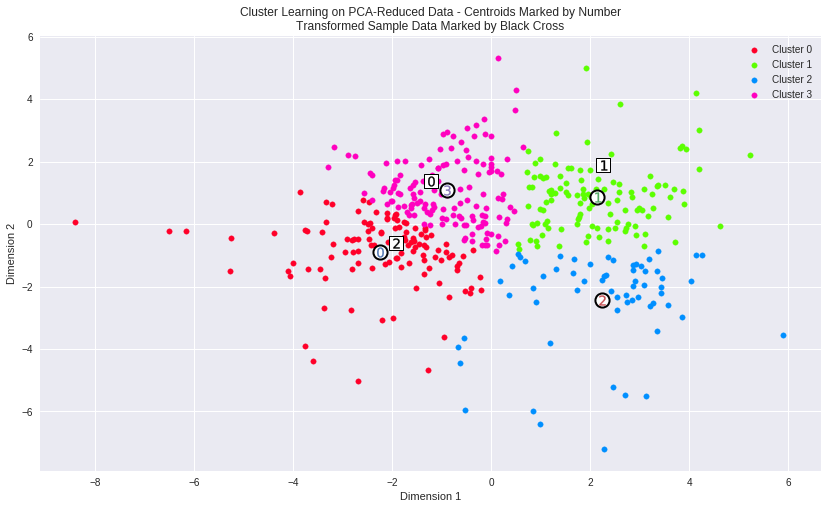

In [29]:
# Using K=4 to generate four clusters, in which cluster 0 is a pure Hotel/Restaruant/Cafe cluster

kmean_preds, centers, sample_preds, score = kmean_cluster(4, reduced_data, pca_samples)
print("display clustering visualisation for 4 clusters, in which cluster 0 is a pure Hotel/Restaurant/Cafe cluster")
print("------------------------------------------------")
cluster_results2(reduced_data, kmean_preds, centers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

By using the K-Means algorithm, and by choosing to generate two clusters, the resulted clusters from K-Means matched well with this underlying distribution of Hotel/Restaurant/Cafe and Retailer customers.  For each of the two K-Means generated clusters, there is a small number of mismatched data points when compared to the this 'Chanel' distribution.  However, when using K-Mean to generated four clusters, cluster 0, as shown above, is a purely Hotels/Restaurants/Cafes customer segment. 

This classification of Hotel/Restaurant/Cafe v.s. Retailers is consistent with the definition that is given in the answer to **Question 8**. In which the predicted classifications is Non-retailing v.s. Retailing establishments. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.